## **Predictive Modelling of Customer Churn and Retention Strategies for a Telecommunication Company: An Analysis for Vodafone Corporation**
## BUSINESS UNDERSTANDING

As a leading telecommunication corporation recognizes the criticality of customer retention in sustaining business growth. The escalating issue of customer churn can have a detrimental impact on a company's revenue and profitability, as acquiring new customers is often more costly than retaining existing ones. To address this challenge, this project aims to assist a telecommunication company in analysing customer churn patterns, identifying factors influencing churn, and developing effective customer retention strategies by leveraging machine learning techniques.

The primary objective is to develop robust machine-learning models_balanced to predict customer churn accurately. By analysing historical customer data, the aim is to identify key indicators of churn and formulate targeted retention strategies to reduce customer attrition to achieve higher profitability.

This dataset contains different features information such as:

* Gender — Whether the customer is a male or a female

* SeniorCitizen — Whether a customer is a senior citizen or not

* Partner — Whether the customer has a partner or not (Yes, No)

* Dependents — Whether the customer has dependents or not (Yes, No)

* Tenure — Number of months the customer has stayed with the company

* Phone Service — Whether the customer has a phone service or not (Yes, No)

* MultipleLines — Whether the customer has multiple lines  

* InternetService — Customer’s internet service provider (DSL, Fiber Optic, No)

* OnlineSecurity — Whether the customer has online security or not (Yes, No, No Internet)

* OnlineBackup — Whether the customer has online backup or not (Yes, No, No Internet)

* DeviceProtection — Whether the customer has device protection or not (Yes, No, No internet service)

* TechSupport — Whether the customer has tech support or not (Yes, No, No internet)

* StreamingTV — Whether the customer has streaming TV or not (Yes, No, No internet service)

* StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet service)

* Contract — The contract term of the customer (Month-to-Month, One year, Two year)

* PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)

* Payment Method — The customer’s payment method (Electronic check, mailed check, Bank transfer(automatic), Credit 
card(automatic))

* MonthlyCharges — The amount charged to the customer monthly

* TotalCharges — The total amount charged to the customer

* Churn — Whether the customer churned or not (Yes or No)

             HYPOTHESIS

Null Hypothesis (H0):Null Hypothesis (H0): There is no significant difference in churn rates between customers with longer contract terms and those using the payment method (Automatic).


Alternative Hypothesis (H1): There is a significant difference in churn rates between customers with longer contract terms and those using the payment method (Automatic).

### QUESTIONS

 
1. How do contract terms and payment methods correlate with customer churn?

2. Are there specific services that significantly impact churn rates?

3. Are there specific services that customers with longer contract terms tend to use more frequently?

4. Do customers using automatic payment methods show different churn patterns compared to other payment methods?

5. Are senior citizens more or less likely to churn compared to non senior citizens?





## DATA UNDERSTANDING
## Importation

In [102]:
#data handling 
import pandas as pd 
import numpy as np
import pyodbc
from dotenv import dotenv_values
import warnings
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# machinelearning
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, roc_auc_score,make_scorer,auc
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,OneHotEncoder,LabelEncoder,FunctionTransformer
from sklearn.feature_selection import SelectKBest,mutual_info_classif




#balance
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.pipeline import make_pipeline as imbpipeline

# Hyperparameters Fine-tuning 
from sklearn.model_selection import GridSearchCV


#other utili
import joblib






##  EDA

### Data Loading
#### **Training Set (SQL)**

In [4]:
#PULLING VARIABLES from an environment
environment_variables = dotenv_values('.env')
 
database = environment_variables.get("database_name")
server = environment_variables.get("server_name")
username = environment_variables.get("Login")
password = environment_variables.get("password")
 

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
 

connection = pyodbc.connect(connection_string)

In [5]:
query = 'SELECT * FROM dbo.LP2_Telco_churn_first_3000'
data = pd.read_sql(query, connection)
#convert to df
df = pd.DataFrame(data)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,3000,3000,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,3000,2,Male,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,3000,2,False,2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,3000,2,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,3000,2,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,3000.0,NaN,NaN,NaN,32.527333,24.637768,0.0,9.0,29.0,56.0,72.0
PhoneService,3000,2,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2731,2,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,3000,3,Fiber optic,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,2349,2,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#check for duplicates
dup = df.duplicated().sum()
print(f'This dataset has',dup,'duplicates')

This dataset has 0 duplicates


In [9]:
#check nul values
df.isna().sum()


customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [10]:
#lets get the second dataset 
df_2 = pd.read_csv(r"C:\Users\ndund\OneDrive\Documents\PYTHON\Customer-Chun-Prediction\Datasets\LP2_Telco-churn-last-2000.csv")

df_2.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [12]:
#check for duplicates
dup = df_2.duplicated().sum()
print(f'This dataset has',dup,'duplicates')

This dataset has 0 duplicates


In [13]:
#check nul values
df_2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Univariate Analysis

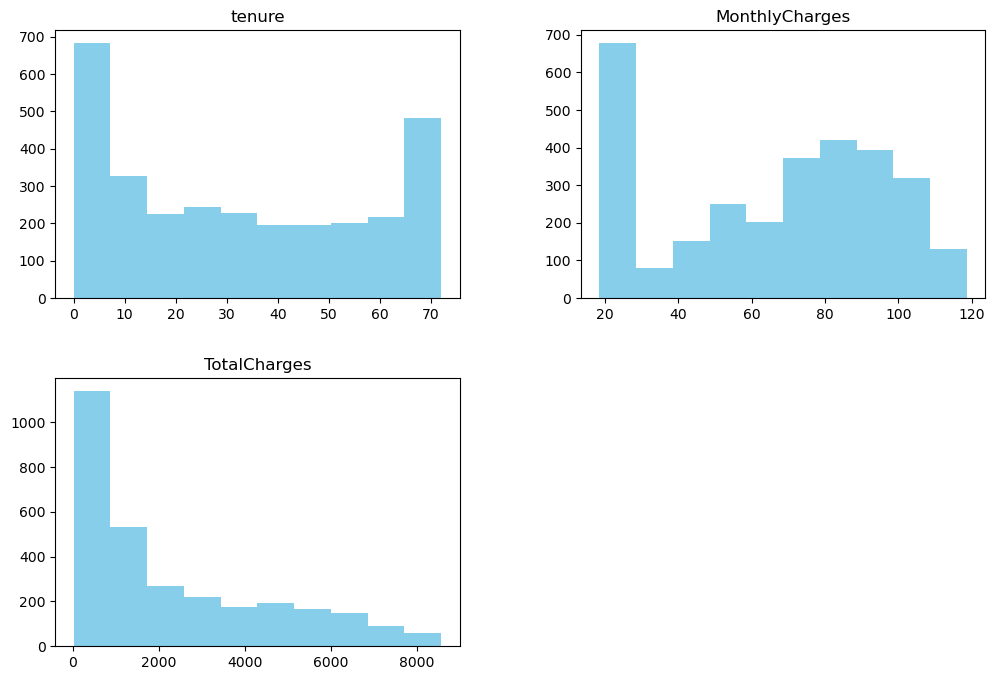

In [14]:
#lets check the distribution of features
df.hist(figsize=(12,8),grid=False,color ="skyblue")
plt.title("The distribution of features")
plt.show()

The visualization reveals the distributions of continuous numerical columns are notably uneven, predominantly exhibiting positive skewness. This observation suggests that these columns may benefit from transformations to achieve a more balanced distribution, which can positively impact the performance of machine learning models_balanced.

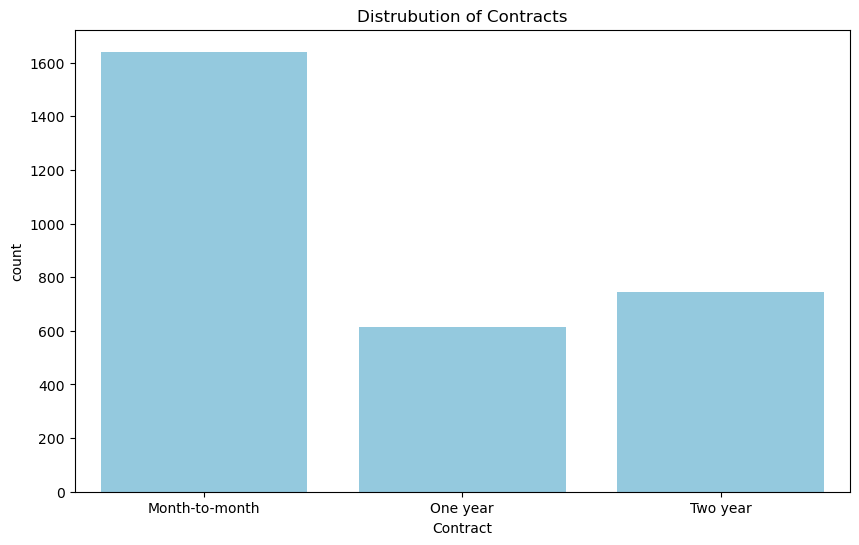

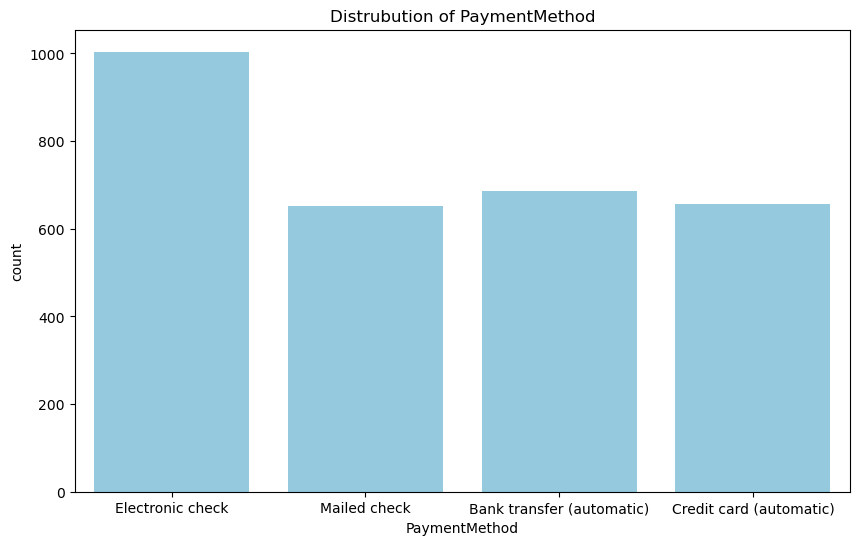

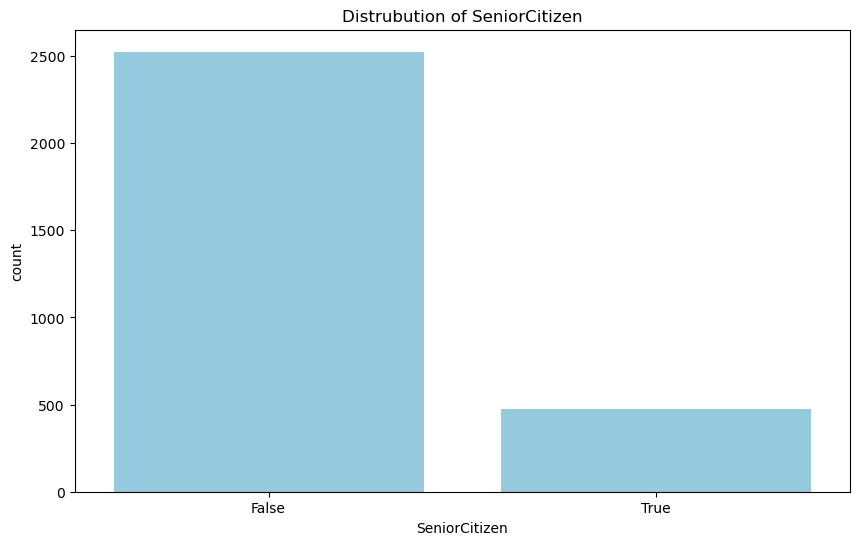

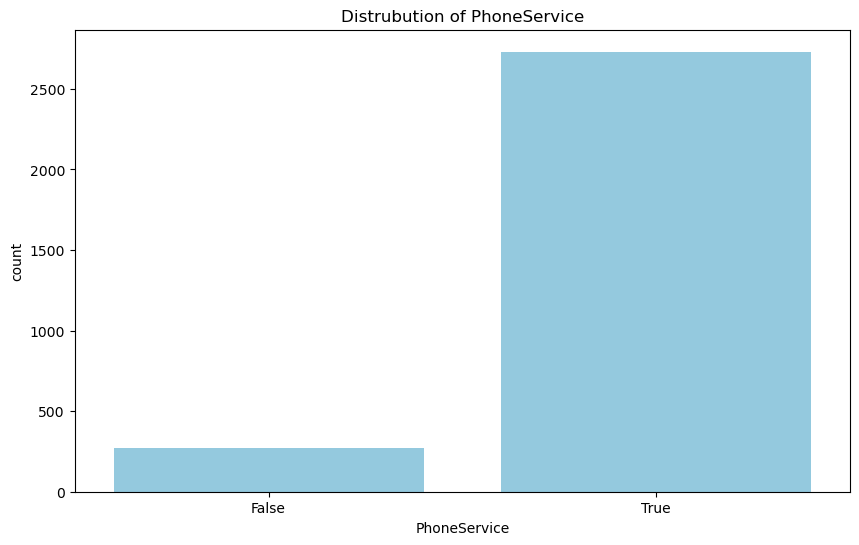

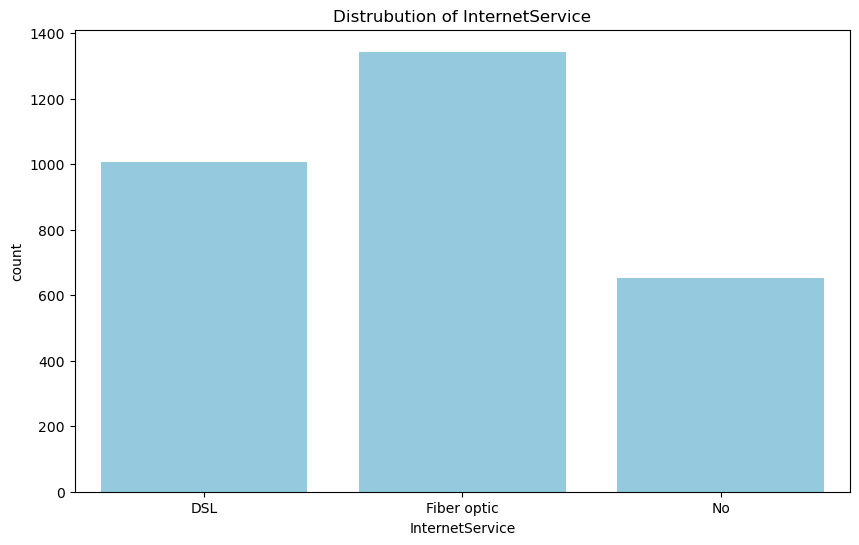

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data= df,x="Contract",color = "skyblue")
plt.title("Distrubution of Contracts")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x="PaymentMethod",data= df,color = "skyblue")
plt.title("Distrubution of PaymentMethod")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x="SeniorCitizen",data= df,color = "skyblue")
plt.title("Distrubution of SeniorCitizen")
plt.show()

#services
plt.figure(figsize=(10,6))
sns.countplot(x="PhoneService",data= df,color = "skyblue")
plt.title("Distrubution of PhoneService")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x="InternetService",data= df,color = "skyblue")
plt.title("Distrubution of InternetService")
plt.show()



The countplot above, utilized for visualizing the distribution of categorical features, reveals a predominant positive skewness in the majority of the categories. This imbalance in our key features may adversely impact the quality and predictive accuracy of our model, emphasizing the need for balance to enhance model performance.







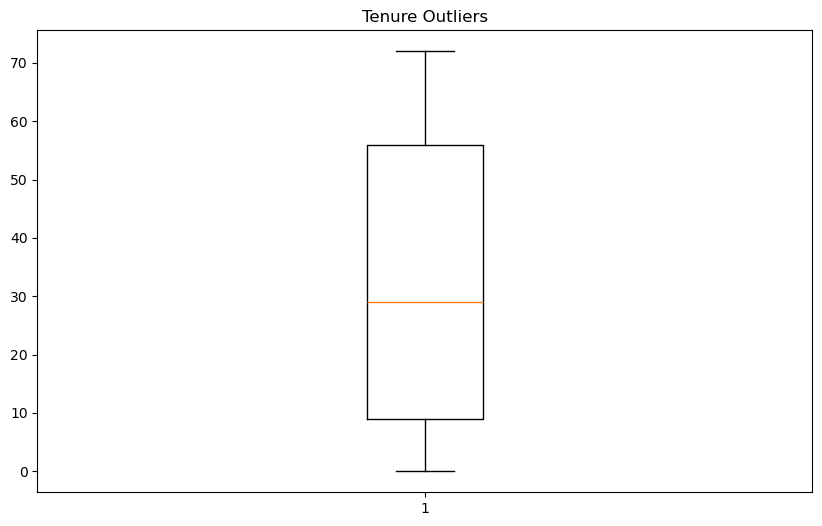

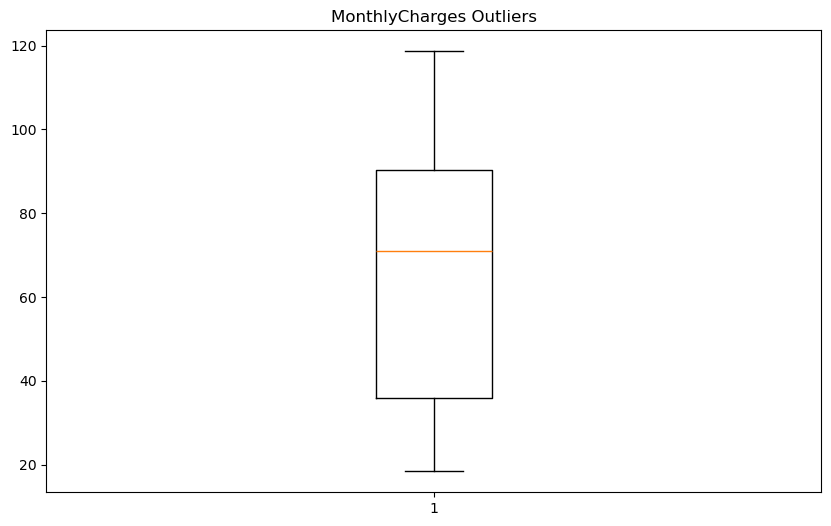

In [16]:
#outliers
datas = df["tenure"]
plt.figure(figsize = (10,6))
plt.boxplot(datas,showfliers=True )
plt.title("Tenure Outliers")
plt.show()

#MonthlyCharges
plt.figure(figsize = (10,6))
plt.boxplot(df["MonthlyCharges"],showfliers=True )
plt.title("MonthlyCharges Outliers")
plt.show()



### Bi-variate Analysis

In [17]:
#relationship among features
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.006424,-0.197925,-0.014067,0.017871,0.159411,0.222478,0.084392
Partner,0.006424,1.000000,0.476960,0.383231,0.014221,0.006101,0.091626,0.326662
Dependents,-0.197925,0.476960,1.000000,0.183903,-0.014152,-0.109342,-0.100752,0.096310
tenure,-0.014067,0.383231,0.183903,1.000000,0.014154,0.006070,0.230240,0.824273
PhoneService,0.017871,0.014221,-0.014152,0.014154,1.000000,0.012459,0.240757,0.110220
PaperlessBilling,0.159411,0.006101,-0.109342,0.006070,0.012459,1.000000,0.351075,0.159661
MonthlyCharges,0.222478,0.091626,-0.100752,0.230240,0.240757,0.351075,1.000000,0.641280
TotalCharges,0.084392,0.326662,0.096310,0.824273,0.110220,0.159661,0.641280,1.000000


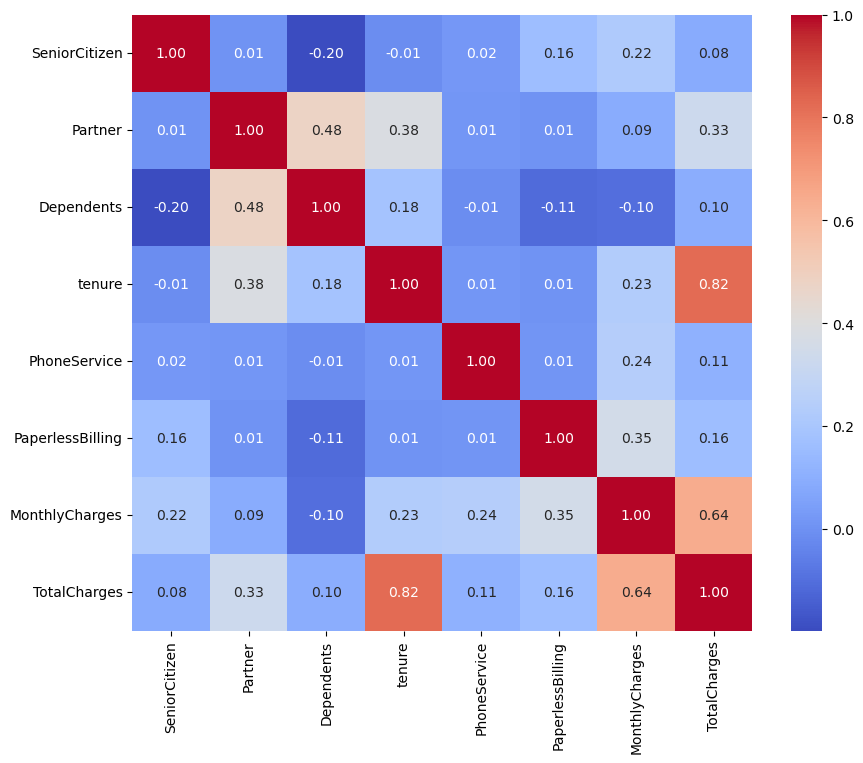

In [18]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In this heatmap, we observe the correlation matrix of continuous features. Notably, the 'TotalCharges' column exhibits a moderate correlation with both 'tenure' and 'MonthlyCharges.' Similarly, the 'Partner' column demonstrates a moderate correlation with the 'Dependents' column. This insight can be leveraged for in-depth analysis and feature engineering, particularly when exploring and enhancing relationships among the mentioned columns.







In [19]:
# Create a contingency table 
contingency_table = pd.crosstab(df['Contract'], df['Churn'])
contingency_table 

Churn,False,True
Contract,,
Month-to-month,940,701
One year,544,69
Two year,735,10


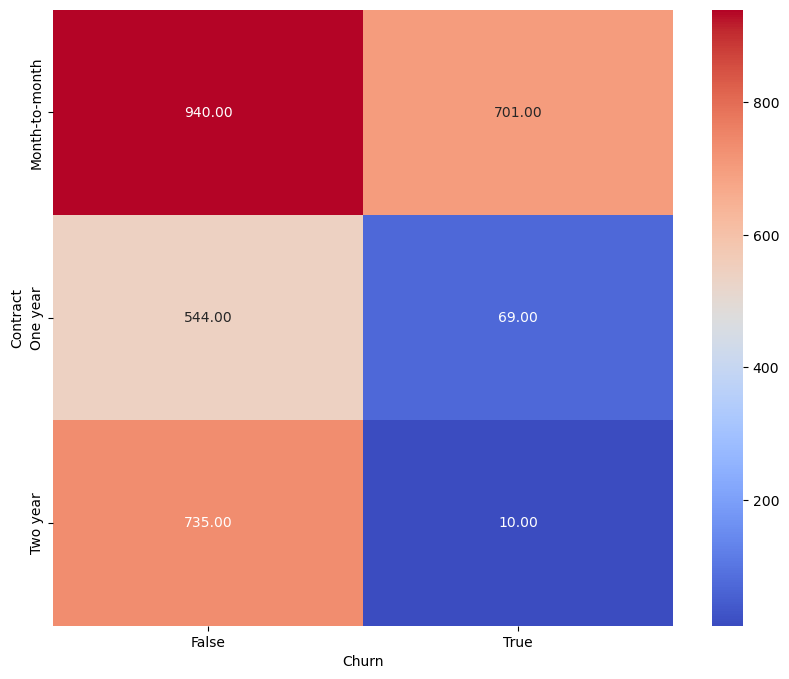

In [20]:

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

The contingency table illustrates the distribution of the 'Contract' variable in rows and the 'Churn' variable in columns. Each cell in the table represents the count of observations corresponding to the combination of categories. When visualized using a heatmap, a notable observation emerges: there is a positive correlation between the contract length of 'Month-to-Month' and 'False' churn but mid relationship with 'True' churn, whereas the contract length of 'Two Year' exhibits a mid association with 'True' churn. This observation aligns closely with our initial hypothesis.

In [21]:
# Create a contingency table 
contingency_table2 = pd.crosstab(df['PaymentMethod'], df['Churn'])
contingency_table2 


Churn,False,True
PaymentMethod,,
Bank transfer (automatic),565,122
Credit card (automatic),566,91
Electronic check,553,450
Mailed check,535,117


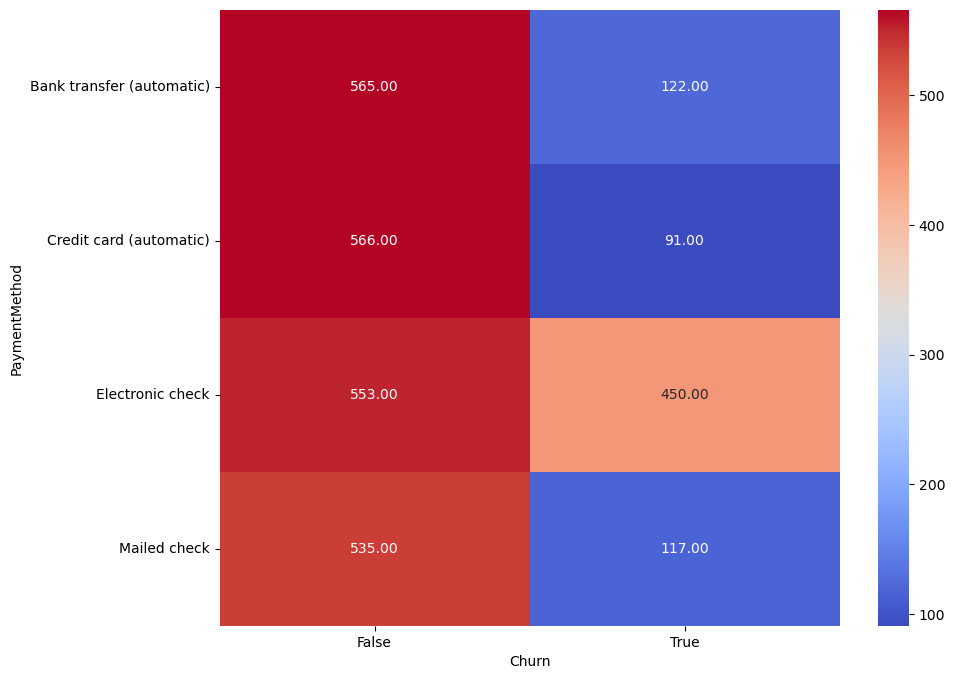

In [22]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table2, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Utilizing a heatmap, we visualized the distribution of the 'Contract' variable in rows and the 'Churn' variable. Notably, we observed that the Payment Method categorized as 'Automatic' demonstrates a positive correlation with 'False' churn. Additionally, the Payment Method labeled as 'Electronic check' exhibits a moderate correlation with 'True' churn and a positive correlation with 'False' churn. This evidence provides valuable insights that can be employed to address and validate our initial hypothesis.

In [23]:
# Create a contingency table 
contingency_table4= pd.crosstab(df['gender'], df['Churn'])
contingency_table4 


Churn,False,True
gender,,
Female,1079,384
Male,1140,396


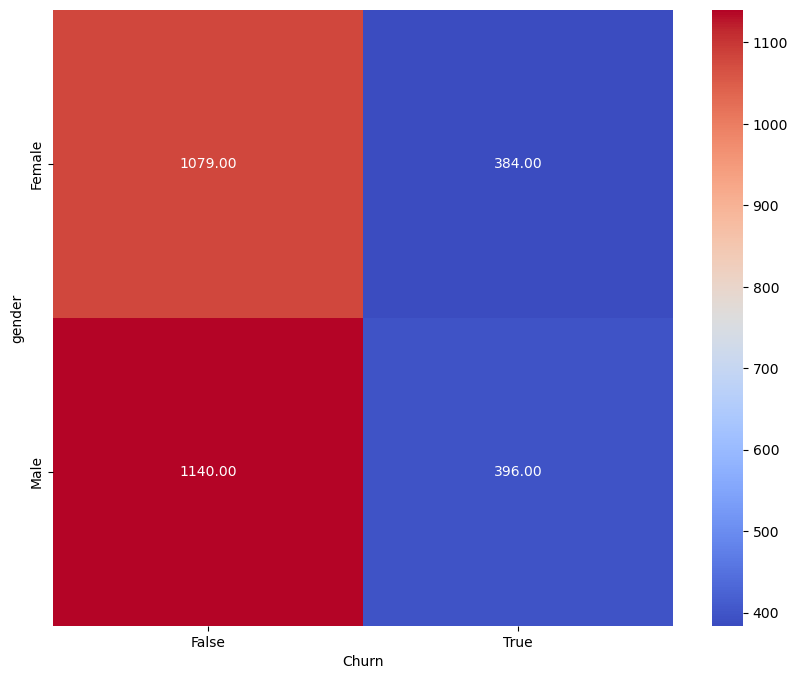

In [24]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table4, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Multivariate Analysis


In [25]:
df.dropna(subset="Churn", inplace = True)


<Figure size 1000x800 with 0 Axes>

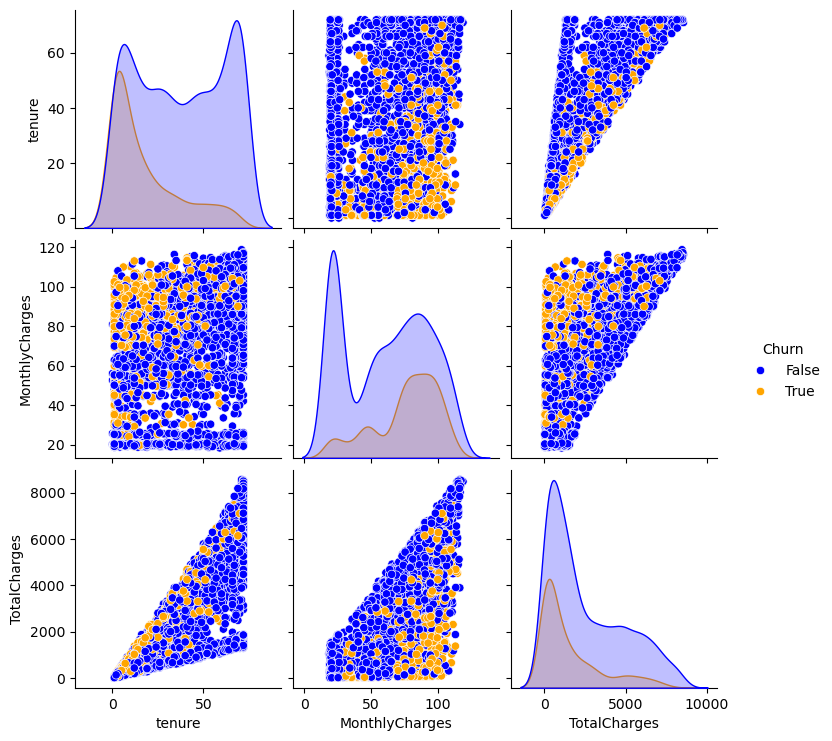

In [26]:

data = df[["tenure","MonthlyCharges",'TotalCharges','Churn']]
plt.figure(figsize=(10, 8))
sns.pairplot(data,palette={True:'orange',False:'blue'}, hue = 'Churn')
plt.show()

### Answer Questions

1. How do contract terms and payment methods correlate with customer churn?


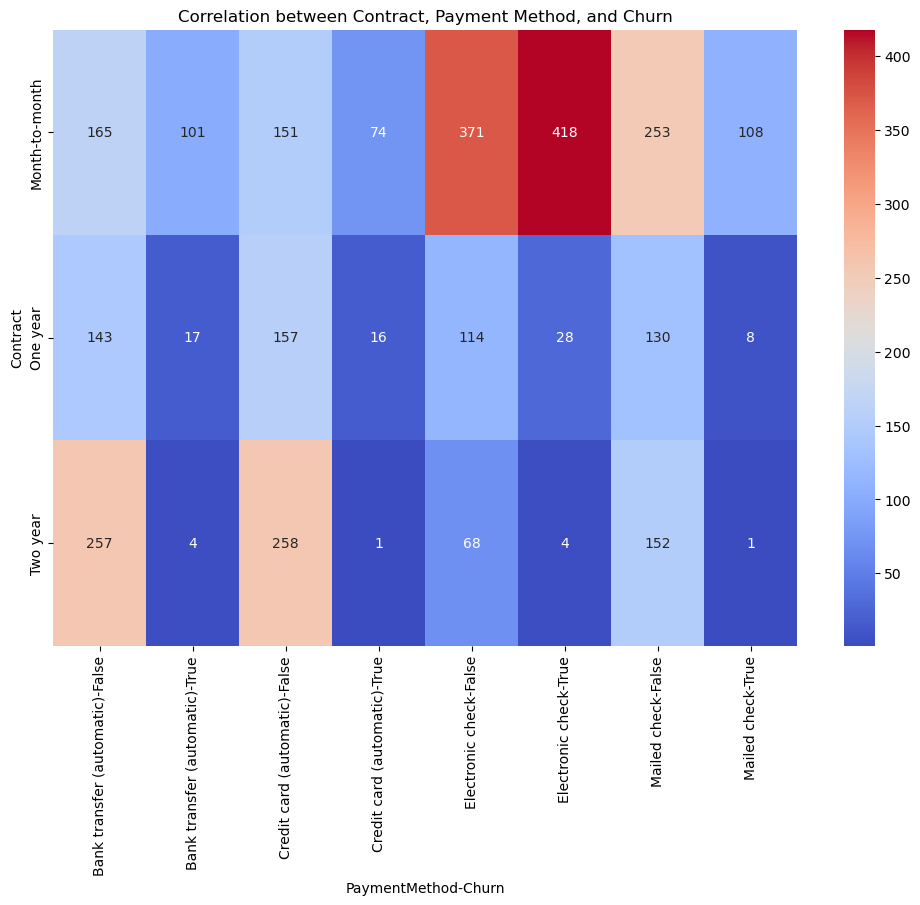

In [27]:
#  a contingency table
contingency_table3 = pd.crosstab(index=df['Contract'], columns=[df['PaymentMethod'], df['Churn']])

# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table3, annot=True, cmap='coolwarm', fmt='g')
plt.title('Correlation between Contract, Payment Method, and Churn')
plt.show()

Based on the observed data, the Contract term of "Two Year" exhibits a moderate correlation with both variables: "Churn" (False) and "PaymentMethod" (Automatic). Conversely, the Contract term of "Month-to-month" shows a positive correlation with both variables: "Churn" (True) and "PaymentMethod" (Electronic check). This evidence supports the hypothesis that customers with longer contract terms (Two Year) are less likely to churn (Churn=False) and are more inclined to use automatic payment methods. On the other hand, customers with shorter, month-to-month contracts are more likely to churn (Churn=True) and tend to prefer the Electronic check payment method.

2. Are there specific services that significantly impact churn rates?

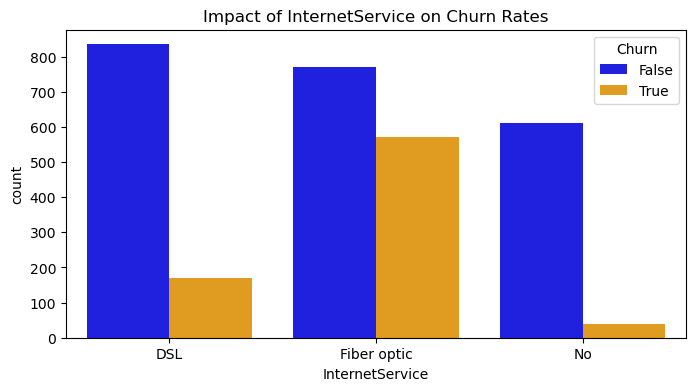

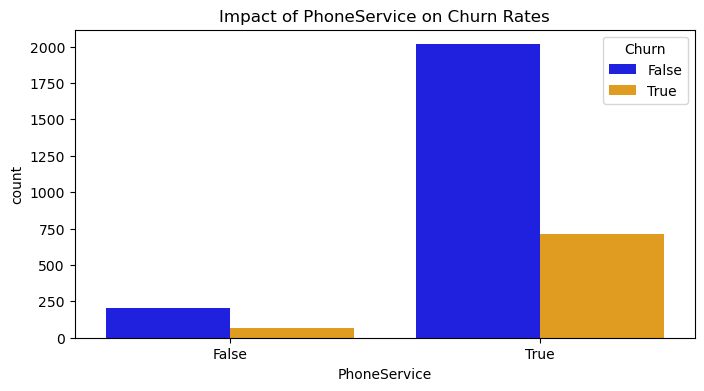

In [28]:


# bar plot
plt.figure(figsize=(8, 4))
sns.countplot(x='InternetService', hue='Churn', data=df, palette={True:'orange',False:'blue'})
plt.title('Impact of InternetService on Churn Rates')
plt.show()

# bar plot 
plt.figure(figsize=(8, 4))
sns.countplot(x='PhoneService', hue='Churn', data=df, palette={True:'orange',False:'blue'})
plt.title('Impact of PhoneService on Churn Rates')
plt.show()

In the analysis, two services, namely (InternetService) and (PhoneService), were selected. The visualization clearly indicates a positive impact on the Churn rate, with the majority showing a False Churn. This observation strongly supports the notion that specific services play a significant role in influencing the Churn rate.

3. Are there specific services that customers with longer contract terms tend to use more frequently?

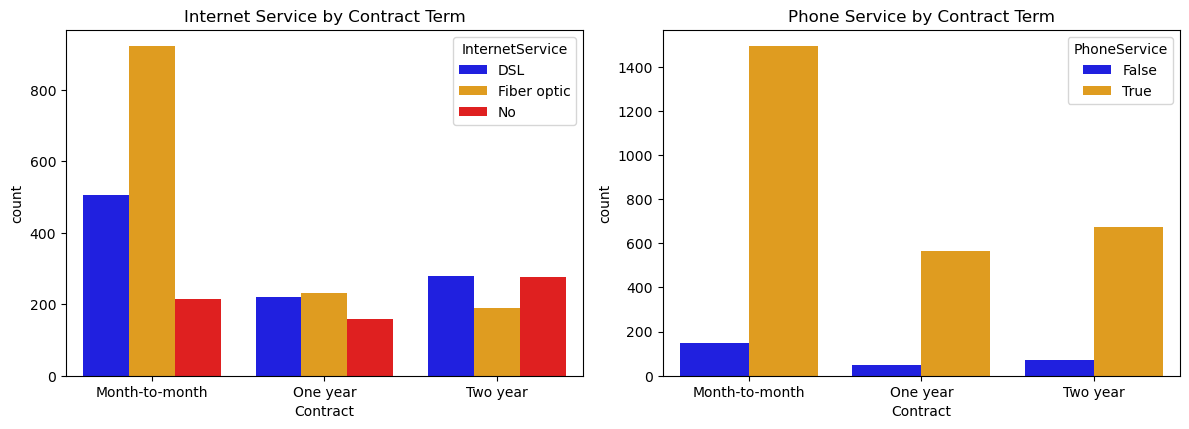

In [29]:
plt.figure(figsize=(12, 8))

# InternetService
plt.subplot(2, 2, 1)
sns.countplot(x='Contract', hue='InternetService', data=df, palette={'Fiber optic':'orange','DSL':'blue','No':'red'})
plt.title('Internet Service by Contract Term')

# PhoneService
plt.subplot(2, 2, 2)
sns.countplot(x='Contract', hue='PhoneService', data=df, palette={True:'orange',False:'blue'})
plt.title('Phone Service by Contract Term')


plt.tight_layout()
plt.show()

Analyzing the bar plot for two services, namely (InternetService) and (PhoneService), it is evident that customers with longer contract terms predominantly opt for Fiber Optic in the case of internet service and utilize phone services more frequently. This observation suggests that longer contract terms have a positive influence on the selected services.

4. Do customers using automatic payment methods show different churn patterns compared to other payment methods?

In [30]:
fig = px.histogram(df, x='PaymentMethod', color='Churn', barmode='stack',
                   color_discrete_map={True:'orange', False:'blue'},
                   labels={'PaymentMethod': 'Payment Method', 'Churn': 'Churn'},
                   title='Churn Patterns by Payment Method')

fig.update_layout(xaxis_title='Payment Method', yaxis_title='Count', showlegend=True)
fig.show()

Upon examining the diverse churn patterns based on customer payment methods, it is evident that customers using the (automatic) payment method exhibit a False churn pattern. In contrast, the (Electronic check) payment method shows a True churn pattern. This provides valuable insights in line with the hypothesis.

5. Are senior citizens more or less likely to churn compared to non senior citizens?

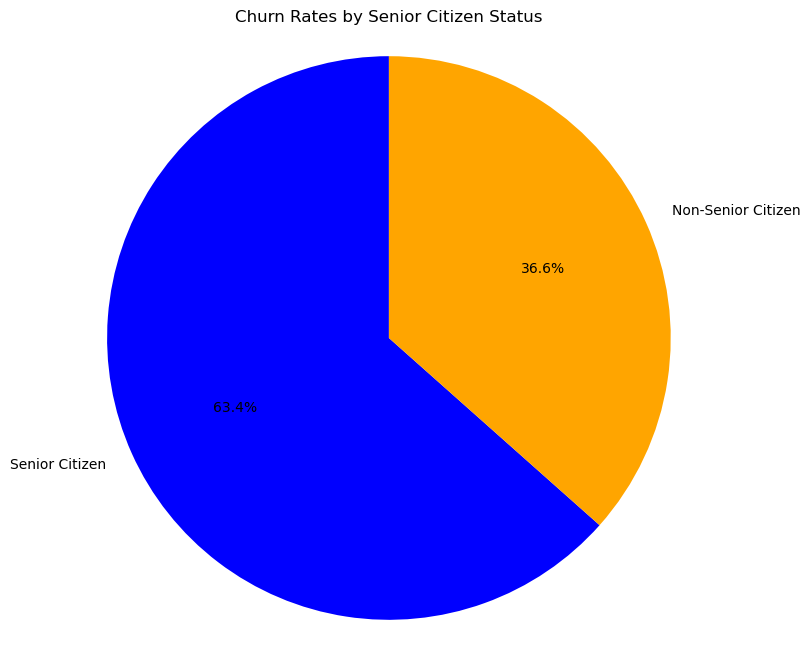

In [31]:
# mean churn rates for senior citizens and non-senior citizens
senior_churn_rate = df[df['SeniorCitizen'] == 1]['Churn'].mean()
non_senior_churn_rate = df[df['SeniorCitizen'] == 0]['Churn'].mean()

# plot pie chart
labels = ['Senior Citizen', 'Non-Senior Citizen']
sizes = [senior_churn_rate, non_senior_churn_rate]
colors = ['blue', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Churn Rates by Senior Citizen Status')
plt.axis('equal') 
plt.show()


The chart above clearly indicates that Senior Citizens are less likely to churn, with a churn rate of 63.4%, in comparison to non-Senior Citizens. This insight can be leveraged for strategic considerations.

#### **CONCAT DATASETS**

In [32]:
# to view all max row
#pd.set_option('display.max_rows',None) 

#concert the datasets
df_coc = pd.concat([df,df_2])

#reset index of the conc dataset
df_coc = df_coc.reset_index(drop=True)

df_coc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


## DATA PREPARATION

In [33]:
df_coc.nunique()

customerID          5042
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4883
Churn                  4
dtype: int64

In [34]:
# Dictionary for mapping
mapping = {True:"Yes", False: "No"}

# Nested for loop to access each element in the column.
for col in df_coc[["MultipleLines", "OnlineSecurity","PaperlessBilling", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]]:
    for cols in range(len(df_coc)):
        if df_coc[col][cols] in mapping:
            df_coc[col][cols] = mapping[df_coc[col][cols]]

# Nested for loop to access each element in the column.
for col in df_coc[["Partner", "Dependents", "PhoneService", "Churn"]]:
    for cols in range(len(df_coc)):
        if df_coc[col][cols] in mapping:
            df_coc[col][cols] = mapping[df_coc[col][cols]]


In [35]:
df_coc['MonthlyCharges'] = df_coc['MonthlyCharges'].round(2)

In [36]:


#  Converts and formats the provided value to a float with two decimal places,handling empty strings and non-numeric data
def clean_and_round_total_charges(value):
    try:
        if isinstance(value, str) and value.strip() != '':
            return round(float(value.replace("'", "")), 2)
        elif isinstance(value, (float, int)):
            return round(float(value), 2)
        else:
            return np.nan
    except ValueError:
        return np.nan

df_coc['TotalCharges']=df_coc['TotalCharges'].apply(clean_and_round_total_charges)

In [37]:
df_coc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5042 non-null   object 
 1   gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   int64  
 3   Partner           5042 non-null   object 
 4   Dependents        5042 non-null   object 
 5   tenure            5042 non-null   int64  
 6   PhoneService      5042 non-null   object 
 7   MultipleLines     4773 non-null   object 
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    4391 non-null   object 
 10  OnlineBackup      4391 non-null   object 
 11  DeviceProtection  4391 non-null   object 
 12  TechSupport       4391 non-null   object 
 13  StreamingTV       4391 non-null   object 
 14  StreamingMovies   4391 non-null   object 
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   object 


### save the clean df_coc to excel file 

In [136]:

Lp2_df_coc = df_coc

csv_file_path = r"c:\Users\ndund\OneDrive\Documents\excel sheets\Lp2_df_coc.xlsx"

Lp2_df_coc.to_excel(csv_file_path, engine='openpyxl',index=False)


### Divide data into input and output

In [38]:
#create input (X) and lable (Y)
X = df_coc.drop(["customerID","Churn"],axis=1)

Y = df_coc["Churn"]

In [39]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [40]:
Y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [41]:

#Split the data into training and testing sets
X_train, X_eval,Y_train,Y_eval = train_test_split(X,Y, test_size=0.2, random_state=42,stratify = Y )

print("Training set shape:",X_train.shape,"Evaluating Set Shape",X_eval.shape)

Training set shape: (4033, 19) Evaluating Set Shape (1009, 19)


## Feature Engineering

### Pipeline


In [42]:
# seperate the catg and numerical feature
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']
num_col

#catg
catg_col = ['gender', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
catg_col

['gender',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [43]:

def log1p_transform(X):
    X['TotalCharges'] = np.log1p(X['TotalCharges'])
    return X

# Feature pipeline
num_pipeline = Pipeline(steps=[
    ("log_transformer", FunctionTransformer(func=log1p_transform, validate=False)),
    ("num_imputer", SimpleImputer(strategy="median", missing_values=np.nan)),
    ("num_scaler", RobustScaler()),
])

catg_pipeline = Pipeline(steps=[
    ("catg_imputer", SimpleImputer(strategy="most_frequent", missing_values=np.nan)),
    ("catg_encoder", OneHotEncoder(handle_unknown= "ignore")),

    
])

# End-to-end feature preprocessor
preprocessor = ColumnTransformer([
    ("num_preprocessor", num_pipeline, num_col),
    ("catg_preprocessor", catg_pipeline, catg_col),
])


### Encode label/target

In [44]:
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)
Y_eval_encoded = le.fit(Y_eval)

### ML Pipeline

###  Tree based model

In [45]:
#create
decision_tree_pipeline = Pipeline(steps =[
    ("preprocessor",preprocessor),
    ("Treeclassifier",DecisionTreeClassifier(random_state = 42)),
])

#train
decision_tree_pipeline.fit(X_train, Y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_preprocessor',
                                                  Pipeline(steps=[('log_transformer',
                                                                   FunctionTransformer(func=<function log1p_transform at 0x000001C3F4E6FF60>)),
                                                                  ('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'SeniorCitizen']),
                                                 ('catg_preprocess...
                                                                  ('catg_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('Treeclassifier', DecisionTreeClassifier(random_state=42))])

In [46]:
 # Convert labels to array-like
Y_eval_array = Y_eval_encoded.transform(Y_eval)

#Predict using the test set
Y_predict = decision_tree_pipeline.predict(X_eval)

#define the matrix
matrix = confusion_matrix(Y_eval_array, Y_predict)
matrix = pd.DataFrame(matrix).reset_index(drop=True)
matrix

,0,1
0,581,161
1,130,137


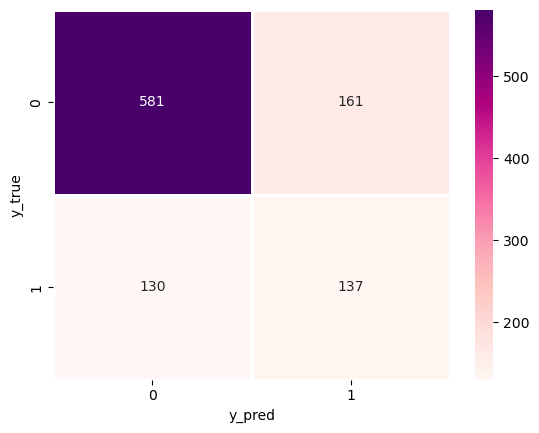

In [47]:
#Visualize matrix
f,ax = plt.subplots()
sns.heatmap(matrix,
            annot=True,
            linewidth=1.0,
            fmt=".0f",
            cmap="RdPu",
            ax=ax)
plt.xlabel ("y_pred")
plt.ylabel ("y_true")
plt.show()

In [48]:
# we have to inverse (name) if need so
# classification report
classification_report = classification_report(Y_eval_array, Y_predict, target_names=['Not_Churned', 'Churned'])
print ("DecisionTreeClassifier\n",classification_report)


DecisionTreeClassifier
               precision    recall  f1-score   support

 Not_Churned       0.82      0.78      0.80       742
     Churned       0.46      0.51      0.48       267

    accuracy                           0.71      1009
   macro avg       0.64      0.65      0.64      1009
weighted avg       0.72      0.71      0.72      1009



### Gradient Descent model

In [49]:
#Gradient Boosting algorithm
catboost_pipeline = Pipeline(steps =[
    ("preprocessor",preprocessor),
    ("Catclassifier", CatBoostClassifier(random_state = 42,logging_level='Silent')),
])

#train
catboost_pipeline.fit(X_train, Y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_preprocessor',
                                                  Pipeline(steps=[('log_transformer',
                                                                   FunctionTransformer(func=<function log1p_transform at 0x000001C3F4E6FF60>)),
                                                                  ('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'SeniorCitizen']),
                                                 ('catg_preprocess...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('Catclassifier',
                 <catboost.core.CatBoostClassifier object at 0x000001C3F4ECFD90>)])

In [50]:
#Predict using the test set
Y_pred = catboost_pipeline.predict(X_eval)

#define the matrix
matrix = confusion_matrix(Y_eval_array, Y_pred)
matrix = pd.DataFrame(matrix).reset_index(drop=True)
matrix

,0,1
0,665,77
1,128,139


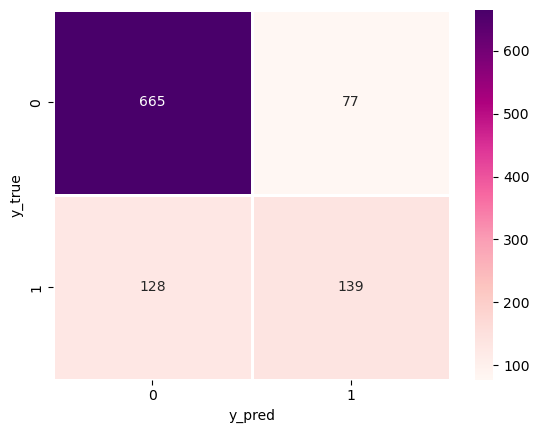

In [51]:
#Visualize matrix
f, ax = plt.subplots()
sns.heatmap(matrix,
            annot=True,
            linewidth=1.0,
            fmt=".0f",
            cmap="RdPu",
            ax=ax)
plt.xlabel  ("y_pred")
plt.ylabel  ("y_true")
plt.show()

In [54]:
# classification report
report = classification_report(Y_eval_array, Y_pred, target_names=['Not_Churned', 'Churned'])
print ("CatboostClassifier\n",report)


CatboostClassifier
               precision    recall  f1-score   support

 Not_Churned       0.84      0.90      0.87       742
     Churned       0.64      0.52      0.58       267

    accuracy                           0.80      1009
   macro avg       0.74      0.71      0.72      1009
weighted avg       0.79      0.80      0.79      1009



### Distance based model

In [55]:

KNeighbors_pipeline = Pipeline(steps =[
    ("preprocessor",preprocessor),
    ("K_classifier", KNeighborsClassifier(n_neighbors=3)),
])

#train
KNeighbors_pipeline.fit(X_train, Y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_preprocessor',
                                                  Pipeline(steps=[('log_transformer',
                                                                   FunctionTransformer(func=<function log1p_transform at 0x000001C3F4E6FF60>)),
                                                                  ('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'SeniorCitizen']),
                                                 ('catg_preprocess...
                                                                  ('catg_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('K_classifier', KNeighborsClassifier(n_neighbors=3))])

In [56]:
#Predict using the test set
Y_pred = KNeighbors_pipeline.predict(X_eval)

#define the matrix
matrix = confusion_matrix(Y_eval_array, Y_pred)
matrix = pd.DataFrame(matrix).reset_index(drop=True)
matrix

,0,1
0,617,125
1,119,148


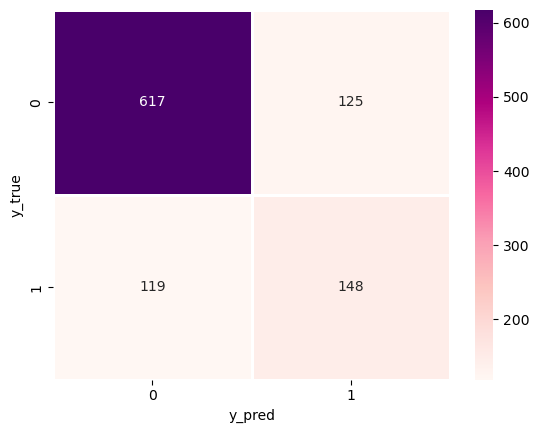

In [57]:
#Visualize matrix
f, ax = plt.subplots()
sns.heatmap(matrix,
            annot=True,
            linewidth=1.0,
            fmt=".0f",
            cmap="RdPu",
            ax=ax)
plt.xlabel ("y_pred")
plt.ylabel ("y_true")
plt.show()

In [58]:
# classification report
K_report = classification_report(Y_eval_array, Y_pred, target_names=['Not_Churned', 'Churned'])
print ("KNeighborsClassifier\n",K_report)

#Accuracy = TN + TP / TOTAL
# F1-score = avg(precision and recall)
# recall = sensitivity predicting

KNeighborsClassifier
               precision    recall  f1-score   support

 Not_Churned       0.84      0.83      0.83       742
     Churned       0.54      0.55      0.55       267

    accuracy                           0.76      1009
   macro avg       0.69      0.69      0.69      1009
weighted avg       0.76      0.76      0.76      1009



## models_inbalanced comparison

In [59]:


models = [
    ("Treeclassifier", DecisionTreeClassifier(random_state=42)),
    ("Catclassifier", CatBoostClassifier(random_state=42,logging_level='Silent')),
    ("K_classifier", KNeighborsClassifier(n_neighbors=3)),
]

# an empty dictionary to store the pipelines
models_pipelines = {}

# Loop through the models_balanced
for classifier_name, classifier in models:
    # Create a new pipeline for each model
    models_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier),
    ])

    # Train 
    models_pipeline.fit(X_train, Y_train_encoded)
    
    # Store trained pipeline in the dictionary
    models_pipelines[classifier_name] = models_pipeline

# Predict on the evaluation set
for classifier_name, models_pipeline in models_pipelines.items():
    Y_pred = models_pipeline.predict(X_eval)
    
    # classification report 
    model_report = classification_report(Y_eval_array, Y_pred, target_names=['Not_Churned', 'Churned'])
    
    # Print 
    print(f"Classification Report for {classifier_name}:\n{model_report}")
    print('='*50)

Classification Report for Treeclassifier:
              precision    recall  f1-score   support

 Not_Churned       0.82      0.78      0.80       742
     Churned       0.46      0.51      0.48       267

    accuracy                           0.71      1009
   macro avg       0.64      0.65      0.64      1009
weighted avg       0.72      0.71      0.72      1009

Classification Report for Catclassifier:
              precision    recall  f1-score   support

 Not_Churned       0.84      0.90      0.87       742
     Churned       0.64      0.52      0.58       267

    accuracy                           0.80      1009
   macro avg       0.74      0.71      0.72      1009
weighted avg       0.79      0.80      0.79      1009

Classification Report for K_classifier:
              precision    recall  f1-score   support

 Not_Churned       0.84      0.83      0.83       742
     Churned       0.54      0.55      0.55       267

    accuracy                           0.76      1009
   ma

### Balance Data

In [60]:
# balance on train set
sampler = RandomOverSampler(random_state=42)
X_train_sampled, Y_train_sampled = sampler.fit_resample(X_train ,Y_train_encoded)
print("Random over-sampling:")
print(len(Y_train_sampled))
print(len(X_train_sampled))

Random over-sampling:
5928
5928


In [69]:
pd.DataFrame(Y_train_sampled).value_counts()

0    2964
1    2964
Name: count, dtype: int64

In [70]:
# train balanced

models_balanced = [
    ("Treeclassifier", DecisionTreeClassifier(random_state=42)),
    ("Catclassifier", CatBoostClassifier(random_state=42,logging_level='Silent')),
    ("logistic_classifier", LogisticRegression(random_state=42)),
    ("K_classifier", KNeighborsClassifier(n_neighbors=3)),
    
]

# empty dictionary to store the pipelines
models_balanced_pipelines = {}

# Loop through the models_balanced
for classifier_name, classifier in models_balanced:
    
    models_balanced_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier),
    ])

    # Train 
    models_balanced_pipeline.fit(X_train_sampled, Y_train_sampled)
    
    # Store trained pipeline in the dictionary
    models_balanced_pipelines[classifier_name] = models_balanced_pipeline
    
for classifier_name, models_balanced_pipeline in models_balanced_pipelines.items():
    Y_pred = models_balanced_pipeline.predict(X_eval)

    # classification report metrics 
    model_report = classification_report(Y_eval_array, Y_pred, target_names=['Not_Churned', 'Churned'])
    
    print(f"Classification Report for {classifier_name}:\n{model_report}")
    print('='*50)

Classification Report for Treeclassifier:
              precision    recall  f1-score   support

 Not_Churned       0.81      0.80      0.80       742
     Churned       0.46      0.48      0.47       267

    accuracy                           0.71      1009
   macro avg       0.64      0.64      0.64      1009
weighted avg       0.72      0.71      0.72      1009

Classification Report for Catclassifier:
              precision    recall  f1-score   support

 Not_Churned       0.88      0.80      0.84       742
     Churned       0.56      0.71      0.62       267

    accuracy                           0.77      1009
   macro avg       0.72      0.75      0.73      1009
weighted avg       0.80      0.77      0.78      1009

Classification Report for logistic_classifier:
              precision    recall  f1-score   support

 Not_Churned       0.91      0.72      0.80       742
     Churned       0.51      0.80      0.62       267

    accuracy                           0.74      100

### Feature importance and Selection

In [71]:

best_features = SelectKBest(mutual_info_classif,k="all")

best_features_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("feature_selection", best_features),
    ])

fit = best_features_pipeline.fit(X_train_sampled, Y_train_sampled)

# get the SelectKBest instance from pipeline
feature_selection = fit.named_steps['feature_selection']

# Looking at the features & their importances
feature_scores = pd.DataFrame(feature_selection.scores_)
selected_columns = pd.DataFrame(X_train_sampled.columns)
columns_x_scores = pd.concat([selected_columns, feature_scores], axis=1)
columns_x_scores.columns = ["Feature", "Score"]

#features with the highest mutual information
top_5_features = columns_x_scores.nlargest(5, "Score")

# Both the importance and type of each feature,
feature_type = []
for feature in top_5_features["Feature"]:
    if feature in num_col:
        feature_type.append("Numerical")
    else:
        feature_type.append("Categorical")

top_5_features["Feature Type"] = feature_type

print("Top 5 features by Mutual Information:")
top_5_features


Top 5 features by Mutual Information:


,Feature,Score,Feature Type
2,Partner,0.667363,Categorical
1,SeniorCitizen,0.313600,Numerical
116,NaN,0.119567,Categorical
0,gender,0.103114,Categorical
118,NaN,0.088229,Categorical


In [72]:


models_balanced = [
    ("Treeclassifier", DecisionTreeClassifier(random_state=42)),
    ("Catclassifier", CatBoostClassifier(random_state=42,logging_level='Silent')),
    ("K_classifier", KNeighborsClassifier(n_neighbors=3)),
    ("logistic_classifier", LogisticRegression(random_state=42)),
]

# an empty dictionary to store the pipelines
models_balanced_pipelines = {}

# Loop through the models_balanced
for classifier_name, classifier in models_balanced:
    
    models_balanced_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("feature_selection",  best_features),
        ("classifier", classifier),
    ])

    # Train 
    models_balanced_pipeline.fit(X_train_sampled, Y_train_sampled)
    
    # Store trained pipeline in the dictionary
    models_balanced_pipelines[classifier_name] = models_balanced_pipeline

# Predict 
for classifier_name, models_balanced_pipeline in models_balanced_pipelines.items():
    Y_pred = models_balanced_pipeline.predict(X_eval)

    
    # classification report metrics f
    model_report = classification_report(Y_eval_array, Y_pred, target_names=['Not_Churned', 'Churned'])
    
     
    print(f"Classification Report for {classifier_name}:\n{model_report}")
    print('='*50)

Classification Report for Treeclassifier:
              precision    recall  f1-score   support

 Not_Churned       0.81      0.80      0.80       742
     Churned       0.46      0.48      0.47       267

    accuracy                           0.71      1009
   macro avg       0.64      0.64      0.64      1009
weighted avg       0.72      0.71      0.72      1009

Classification Report for Catclassifier:
              precision    recall  f1-score   support

 Not_Churned       0.88      0.80      0.84       742
     Churned       0.56      0.71      0.62       267

    accuracy                           0.77      1009
   macro avg       0.72      0.75      0.73      1009
weighted avg       0.80      0.77      0.78      1009

Classification Report for K_classifier:
              precision    recall  f1-score   support

 Not_Churned       0.88      0.70      0.78       742
     Churned       0.47      0.73      0.57       267

    accuracy                           0.71      1009
   ma

### Visualizing model performance

In [80]:


models_balanced = [
    ("Treeclassifier", DecisionTreeClassifier(random_state=42)),
    ("Catclassifier", CatBoostClassifier(random_state=42, logging_level='Silent')),
    ("K_classifier", KNeighborsClassifier(n_neighbors=3)),
    ("logistic_classifier", LogisticRegression(random_state=42)),
]

# an empty dictionary to store the pipelines and predictions
models_balanced_pipelines = {}
predictions = {}


for classifier_name, classifier in models_balanced:
   
    models_balanced_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("feature_selection", best_features),
        ("classifier", classifier),
    ])

    # Train
    models_balanced_pipeline.fit(X_train_sampled, Y_train_sampled)

    # Store trained pipeline in the dictionary
    models_balanced_pipelines[classifier_name] = models_balanced_pipeline

    
    Y_pred = models_balanced_pipeline.predict(X_eval)
    
    # Store predictions
    predictions[classifier_name] = Y_pred

# matrix for each classifier
for classifier_name, Y_pred in predictions.items():
    matrix = confusion_matrix(Y_eval_array, Y_pred)
    print(f"Confusion matrix for {classifier_name}:\n{matrix}")


Confusion matrix for Treeclassifier:
[[592 150]
 [139 128]]
Confusion matrix for Catclassifier:
[[591 151]
 [ 78 189]]
Confusion matrix for K_classifier:
[[520 222]
 [ 72 195]]
Confusion matrix for logistic_classifier:
[[533 209]
 [ 53 214]]


#### ROC curve & AUC

In [81]:


roc_curves = {}
auc_scores = {}

for classifier_name, pipeline in models_balanced_pipelines.items():
    Y_pred_proba = pipeline.predict_proba(X_eval)[:, 1] 
    fpr, tpr, _ = roc_curve(Y_eval_array, Y_pred_proba)
    roc_curves[classifier_name] = (fpr, tpr)
    auc_scores[classifier_name] = roc_auc_score(Y_eval_array, Y_pred_proba)

print("AUC Scores:")
for classifier_name, auc in auc_scores.items():
    print(f"{classifier_name}: {auc:.4f}")


AUC Scores:
Treeclassifier: 0.6397
Catclassifier: 0.8474
K_classifier: 0.7614
logistic_classifier: 0.8467


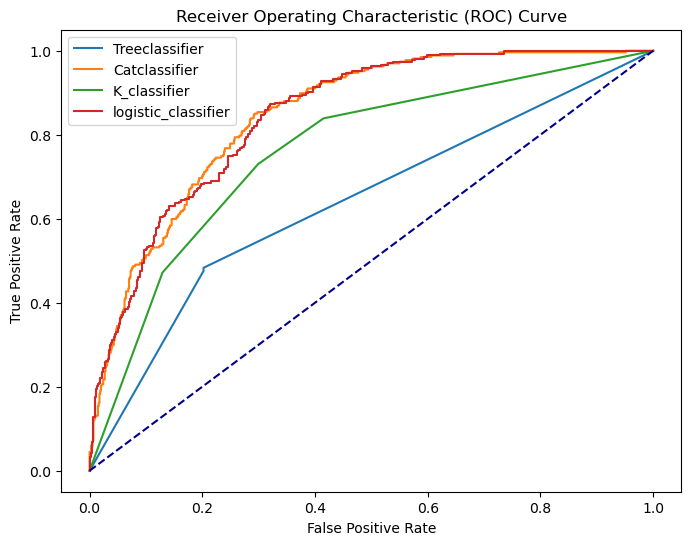

In [82]:


plt.subplots(figsize=(8, 6))
for classifier_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=classifier_name)


plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(False)
plt.show()


### Hyperparameter Tuning

**LogisticRegression**

In [94]:

# Hypertuning and threshold


#  logistic pipeline
logistic_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", best_features),
    ("logistic_classifier", LogisticRegression(random_state=42)),
])

# parameter grid 
param_grid = {
    'logistic_classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic_classifier__class_weight': ['balanced'],
}

# GridSearchCV
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_sampled, Y_train_sampled)






GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_preprocessor',
                                                                         Pipeline(steps=[('log_transformer',
                                                                                          FunctionTransformer(func=<function log1p_transform at 0x000001C3F4E6FF60>)),
                                                                                         ('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_scaler',
                                                                                          RobustScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'Senior...
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('feature_selection',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x000001C3EEC9C0E0>)),
                                       ('logistic_classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logistic_classifier__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                         'logistic_classifier__class_weight': ['balanced']},
             scoring='recall')

In [98]:
# Get the best par from the grid search
best_param = grid_search.best_params_


logistic_pipeline.set_params(**best_param)

best_model_pipeline = logistic_pipeline.fit(X_train_sampled, Y_train_sampled)

# Get predicted 
Y_pred_l = best_model_pipeline.predict(X_eval)



#  classification report
classification_rep = classification_report(Y_eval_array, Y_pred_l,target_names=['Not_Churned', 'Churned'])
print("Classification Report:")
print(classification_rep)

#  confusion matrix
conf_matrix = confusion_matrix(Y_eval_array, Y_pred_l)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

 Not_Churned       0.91      0.72      0.80       742
     Churned       0.51      0.80      0.62       267

    accuracy                           0.74      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.74      0.75      1009

Confusion Matrix:
[[533 209]
 [ 53 214]]


In [99]:
# threshold 
threshold = 0.555267

# predicted probabilities 
Y_pred_proba = best_model_pipeline.predict_proba(X_eval)[:, 1]

# Adjust predictions based on the chosen threshold
Y_pred_threshold = (Y_pred_proba >= threshold).astype(int)

# D classification report
classification_rep = classification_report(Y_eval_array, Y_pred_threshold,target_names=['Not_Churned', 'Churned'])
print("Classification Report:")
print(classification_rep)

#  confusion matrix
conf_matrix = confusion_matrix(Y_eval_array, Y_pred_threshold)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

 Not_Churned       0.89      0.75      0.81       742
     Churned       0.52      0.75      0.61       267

    accuracy                           0.75      1009
   macro avg       0.70      0.75      0.71      1009
weighted avg       0.79      0.75      0.76      1009

Confusion Matrix:
[[554 188]
 [ 67 200]]


In [103]:


# Compute ROC curve and (AUC)
fpr, tpr, thresholds = roc_curve(Y_eval_array, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# to view all max row without .head
pd.set_option('display.max_rows',None) 

table = pd.DataFrame(zip(fpr, tpr, thresholds), columns=['False Positive','True Positive','thresholds'])
table.head()

,False Positive,True Positive,thresholds
0,0.000000,0.000000,inf
1,0.000000,0.003745,0.979525
2,0.000000,0.014981,0.971617
3,0.001348,0.014981,0.968250
4,0.001348,0.033708,0.962787


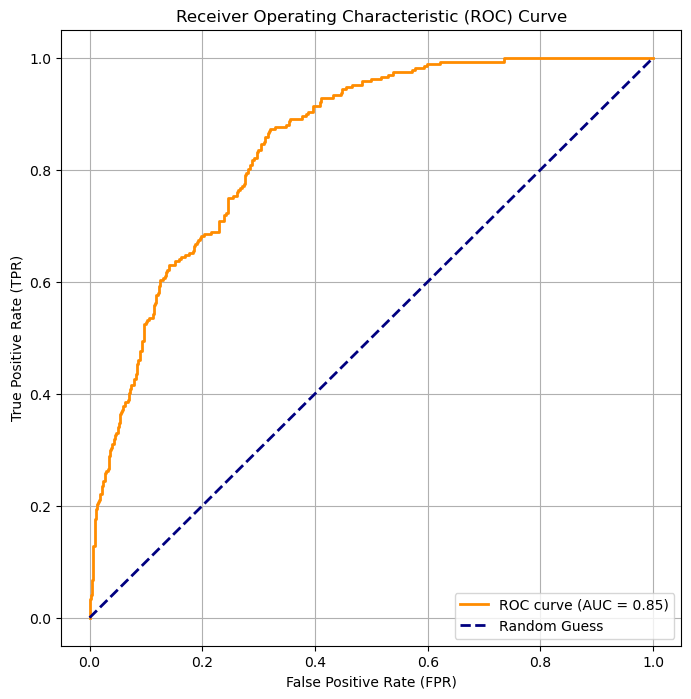

In [104]:




# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')


#  labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Catboost**

In [105]:

#hypertuning and threshold


#  pipeline
catboost_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", best_features),
    ("Catclassifier", CatBoostClassifier(random_state=42, logging_level='Silent')),
])

#  parameter GridSearchCV
param_grid = {
    'Catclassifier__class_weights': [[1, 3], [1, 4], [1, 5]],
    
     
}

#  GridSearchCV
grid_search = GridSearchCV(catboost_pipeline, param_grid, cv=3, scoring='recall')
grid_search.fit(X_train_sampled, Y_train_sampled)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_preprocessor',
                                                                         Pipeline(steps=[('log_transformer',
                                                                                          FunctionTransformer(func=<function log1p_transform at 0x000001C3F4E6FF60>)),
                                                                                         ('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_scaler',
                                                                                          RobustScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'Senior...
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('feature_selection',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x000001C3EEC9C0E0>)),
                                       ('Catclassifier',
                                        <catboost.core.CatBoostClassifier object at 0x000001C3F368F890>)]),
             param_grid={'Catclassifier__class_weights': [[1, 3], [1, 4],
                                                          [1, 5]]},
             scoring='recall')

In [108]:
# Get best model grid search
best_param = grid_search.best_params_

catboost_pipeline.set_params(**best_param)

cat_model_pipeline = catboost_pipeline.fit(X_train_sampled, Y_train_sampled)

# predicted probabilities 
Y_pred_ = cat_model_pipeline.predict(X_eval)


#  classification report
classification_rep = classification_report(Y_eval_array, Y_pred_, target_names=['Not_Churned', 'Churned'])
print("Classification Report:")
print(classification_rep)

# confusion matrix
conf_matrix = confusion_matrix(Y_eval_array, Y_pred_)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

 Not_Churned       0.95      0.61      0.74       742
     Churned       0.45      0.90      0.60       267

    accuracy                           0.68      1009
   macro avg       0.70      0.75      0.67      1009
weighted avg       0.81      0.68      0.70      1009

Confusion Matrix:
[[450 292]
 [ 26 241]]


In [109]:
# Set the 
threshold = 0.729659


# predicted probabilities 
Y_pred_proba = cat_model_pipeline.predict_proba(X_eval)[:, 1]

# Adjust predictions based on threshold
Y_pred_threshold = (Y_pred_proba >= threshold).astype(int)

# classification report
classification_rep = classification_report(Y_eval_array, Y_pred_threshold, target_names=['Not_Churned', 'Churned'])
print("Classification Report:")
print(classification_rep)

#  confusion matrix
conf_matrix = confusion_matrix(Y_eval_array, Y_pred_threshold)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

 Not_Churned       0.91      0.73      0.81       742
     Churned       0.52      0.80      0.63       267

    accuracy                           0.75      1009
   macro avg       0.71      0.77      0.72      1009
weighted avg       0.81      0.75      0.76      1009

Confusion Matrix:
[[544 198]
 [ 54 213]]


In [110]:
# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(Y_eval_array, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# to view all max row
pd.set_option('display.max_rows',None) 

cat = pd.DataFrame(zip(fpr, tpr, thresholds), columns=['False Positive','True Positive','thresholds'])
cat.head()

,False Positive,True Positive,thresholds
0,0.000000,0.000000,inf
1,0.000000,0.003745,0.994492
2,0.000000,0.026217,0.990839
3,0.001348,0.026217,0.990283
4,0.001348,0.033708,0.990196


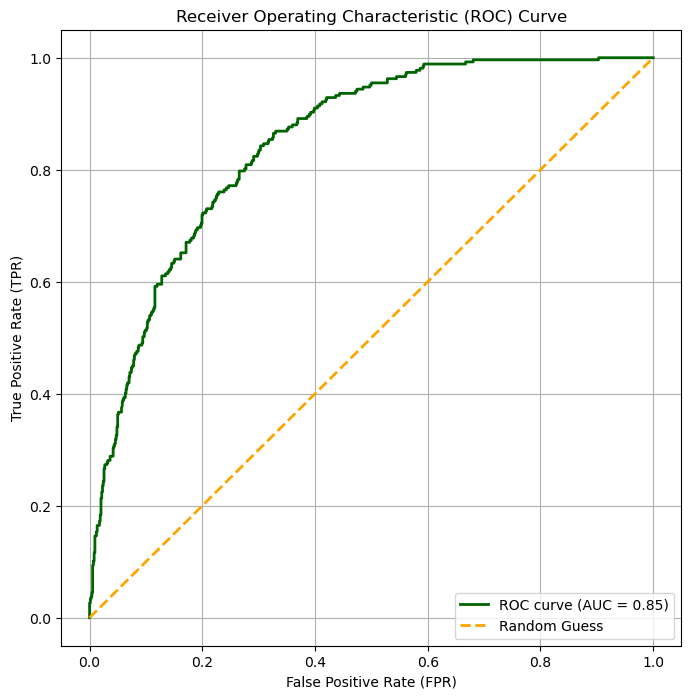

In [111]:



# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--', label='Random Guess')

# labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Balanced models_balanced comparison 

Based on the  classification reports, with sensitivity as priority in churn clients the Catboost report is slightly better at capturing recall, but it comes with a trade-off

**Catboost report :**

Recall for Churned class: 0.80, which is higher than the 0.75 in the Logistic report. This means it correctly identifies a larger proportion of churned customers.
Recall for Not_Churned class: 0.73, which is slightly lower than the 0.75 in the Logistic report. This means it misses a slightly larger proportion of not-churned customers.


**Logistic report** :

Recall for Churned class: 0.75, which is lower than the 0.80 in the Catboost report.
Recall for Not_Churned class: 0.75, which is the same as the Catboost report.

**Trade-off** :

The second report achieves higher recall for the churned class at the cost of slightly lower recall for the not-churned class.

## Business Impact Assessment & Documentation of model

The Catboost Model emerged as the optimal choice following fine-tuning, prioritizing a higher recall score over precision. This decision was intentional, aiming to enhance the model's ability to correctly identify customers belonging to the Churn class rather than being overly precise. To achieve this, a threshold of 0.729659 was applied, making the model more sensitive to positive instances and potentially increasing the True Positive rate. It is acknowledged that this adjustment may lead to an increase in the False Positive rate.

In order to effectively mitigate churn, Vodafone should concentrate on managing key features crucial for predicting customer churn. Notably:

Partner Status: Customers with partners were observed to have a lower likelihood of churning.

Senior Citizen Status: Senior citizen customers exhibited a lower churn rate at 63.4%, compared to non-senior citizens.


All together, Vodafone may focus on Targeted Incentives for Partnered Customers by Identify and target customers who are not currently partnered and provide them with exclusive incentives to encourage partner sign-ups.
Create special partner-related packages or discounts to make Vodafone services more appealing to this customer segment.
Promotions for Senior Citizens by Introduce promotions, discounts, or loyalty programs specifically designed for senior citizens to incentivize their continued use of Vodafone services. Provide personalized customer service for senior citizens, addressing their unique needs and concerns.

### Model Persistence

In [112]:
#save model 
joblib.dump(cat_model_pipeline,'CatboostModel.joblib')
joblib.dump(le,'LabelEncoder.joblib')

['LabelEncoder.joblib']

### Evaluate on the Test Set

In [118]:
test = pd.read_excel(r"C:\Users\ndund\OneDrive\Documents\PYTHON\Customer-Chun-Prediction\Datasets\Telco-churn-second-2000.xlsx")

test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [131]:

#  Converts and formats the provided value to a float,handling empty strings and non-numeric data
def clean_total_charges(value):
    try:
        if isinstance(value, str) and value.strip() != '':
            return float(value.replace("'", ""))
        elif isinstance(value, (float, int)):
            return float(value)
        else:
            return np.nan
    except ValueError:
        return np.nan

test['TotalCharges']= test['TotalCharges'].apply(clean_total_charges)

In [135]:
prediction = cat_model_pipeline.predict(test)
prediction = le.inverse_transform(prediction)
test['Churn'] = prediction
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,No
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
